# 2022-2023 Football Stats Introduction

## About the Data

In this project, we will combine two datasets: the first one is [2022-2023 Football Team Stats](https://www.kaggle.com/datasets/vivovinco/20222023-football-team-stats) and the second one is [2022-2023 Football Player Stats](https://www.kaggle.com/datasets/vivovinco/20222023-football-player-stats).
hese two dataset contain stats for players and teams in the 2022-2023 season.

The first dataset contains 2022-2023 football team stats and the second one contains 2022-2023 football player stats. 
the data is limited these top 5 leagues: Premier League, Ligue 1, Bundesliga, Serie A and La Liga.

## Project Goals

The objective of this project is to utilize the provided datasets to uncover insights and trends within the 2022-2023 football season. Specific aims include:

- [....]
- [....]
- [....]

## Dataset Overview

The datasets focus on a variety of statistics for both teams and players. Below is a brief overview of each dataset's contents.

### Player Stats (`player_stats.csv`)

This file contains detailed performance metrics for players, including:

- **Basic Information**: Player's name, nation, position, squad, league, age, and birth year.
- **Playing Time**: Matches played, starts, minutes played.
- **Offensive Stats**: Goals, shots, shots on target, pass completion rates.
- **Defensive Metrics**: Tackles, interceptions, clearances.
- **Passing**: Total passes attempted/completed, passing distances, types of passes.
- **Advanced Metrics**: Shot-creating actions, goal-creating actions, dribbles, carries.

### Team Stats (`team_stats.csv`)

For teams, the dataset includes:

- **Ranking and Results**: Squad rank, wins, draws, losses, goals for/against, points.
- **Expected Goals (xG)**: xG, xGA (expected goals against), xGD (expected goal difference).
- **Attendance**: Average attendance per game (home matches).
- **Key Players**: Top team scorer, most played goalkeeper.

## 1.1: We will first start by loading the data :

In [123]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# loading the data
playerStatsDf = pd.read_csv('dataset/player_stats.csv', encoding='ISO-8859-1', delimiter=';')
teamStatsDf = pd.read_csv('dataset/team_stats.csv', encoding='ISO-8859-1', delimiter=';')


## 1.2:  We will explore the columns of the dataframes

In [124]:
playerStatsDf.head(5)

,Rk,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,...,Off,Crs,TklW,PKwon,PKcon,OG,Recov,AerWon,AerLost,AerWon%
0,1,Brenden Aaronson,USA,MFFW,Leeds United,Premier League,22,2000,20,19,...,0.17,2.54,0.51,0.0,0.0,0.00,4.86,0.34,1.19,22.2
1,2,Yunis Abdelhamid,MAR,DF,Reims,Ligue 1,35,1987,22,22,...,0.05,0.18,1.59,0.0,0.0,0.00,6.64,2.18,1.23,64.0
2,3,Himad Abdelli,FRA,MFFW,Angers,Ligue 1,23,1999,14,8,...,0.00,1.05,1.40,0.0,0.0,0.00,8.14,0.93,1.05,47.1
3,4,Salis Abdul Samed,GHA,MF,Lens,Ligue 1,22,2000,20,20,...,0.00,0.35,0.80,0.0,0.0,0.05,6.60,0.50,0.50,50.0
4,5,Laurent Abergel,FRA,MF,Lorient,Ligue 1,30,1993,15,15,...,0.00,0.23,2.02,0.0,0.0,0.00,6.51,0.31,0.39,44.4


In [127]:
pd.set_option('display.max_seq_items', None)
print(playerStatsDf.columns)
pd.reset_option('display.max_seq_items')

Index(['Rk', 'Player', 'Nation', 'Pos', 'Squad', 'Comp', 'Age', 'Born', 'MP',
       'Starts', 'Min', '90s', 'Goals', 'Shots', 'SoT', 'SoT%', 'G/Sh',
       'G/SoT', 'ShoDist', 'ShoFK', 'ShoPK', 'PKatt', 'PasTotCmp', 'PasTotAtt',
       'PasTotCmp%', 'PasTotDist', 'PasTotPrgDist', 'PasShoCmp', 'PasShoAtt',
       'PasShoCmp%', 'PasMedCmp', 'PasMedAtt', 'PasMedCmp%', 'PasLonCmp',
       'PasLonAtt', 'PasLonCmp%', 'Assists', 'PasAss', 'Pas3rd', 'PPA',
       'CrsPA', 'PasProg', 'PasAtt', 'PasLive', 'PasDead', 'PasFK', 'TB', 'Sw',
       'PasCrs', 'TI', 'CK', 'CkIn', 'CkOut', 'CkStr', 'PasCmp', 'PasOff',
       'PasBlocks', 'SCA', 'ScaPassLive', 'ScaPassDead', 'ScaDrib', 'ScaSh',
       'ScaFld', 'ScaDef', 'GCA', 'GcaPassLive', 'GcaPassDead', 'GcaDrib',
       'GcaSh', 'GcaFld', 'GcaDef', 'Tkl', 'TklWon', 'TklDef3rd', 'TklMid3rd',
       'TklAtt3rd', 'TklDri', 'TklDriAtt', 'TklDri%', 'TklDriPast', 'Blocks',
       'BlkSh', 'BlkPass', 'Int', 'Tkl+Int', 'Clr', 'Err', 'Touches',
       'TouD

In [125]:
teamStatsDf.head(5)

,Rk,Squad,Country,LgRk,MP,W,D,L,GF,GA,GD,Pts,Pts/MP,xG,xGA,xGD,xGD/90,Attendance,Top Team Scorer,Goalkeeper
0,1,Barcelona,ESP,1,29,23,4,2,53,9,44,73,2.52,55.9,22.7,33.2,1.14,83148,Robert Lewandowski - 17,Marc-André ter Stegen
1,2,Napoli,ITA,1,30,24,3,3,66,21,45,75,2.50,53.2,25.3,27.9,0.93,25662,Victor Osimhen - 21,Alex Meret
2,3,Paris S-G,FRA,1,32,24,3,5,75,31,44,75,2.34,64.7,39.1,25.7,0.80,40508,Kylian Mbappé - 22,Gianluigi Donnarumma
3,4,Arsenal,ENG,1,32,23,6,3,77,34,43,75,2.34,64.1,34.7,29.4,0.92,60203,Martinelli - 15,Aaron Ramsdale
4,5,Manchester City,ENG,2,30,22,4,4,78,28,50,70,2.33,63.5,24.5,39.0,1.30,53203,Erling Haaland - 32,Ederson


# 2: let's start by exploring our data:

# 2.1: visualizing goals scored and conceded by every team

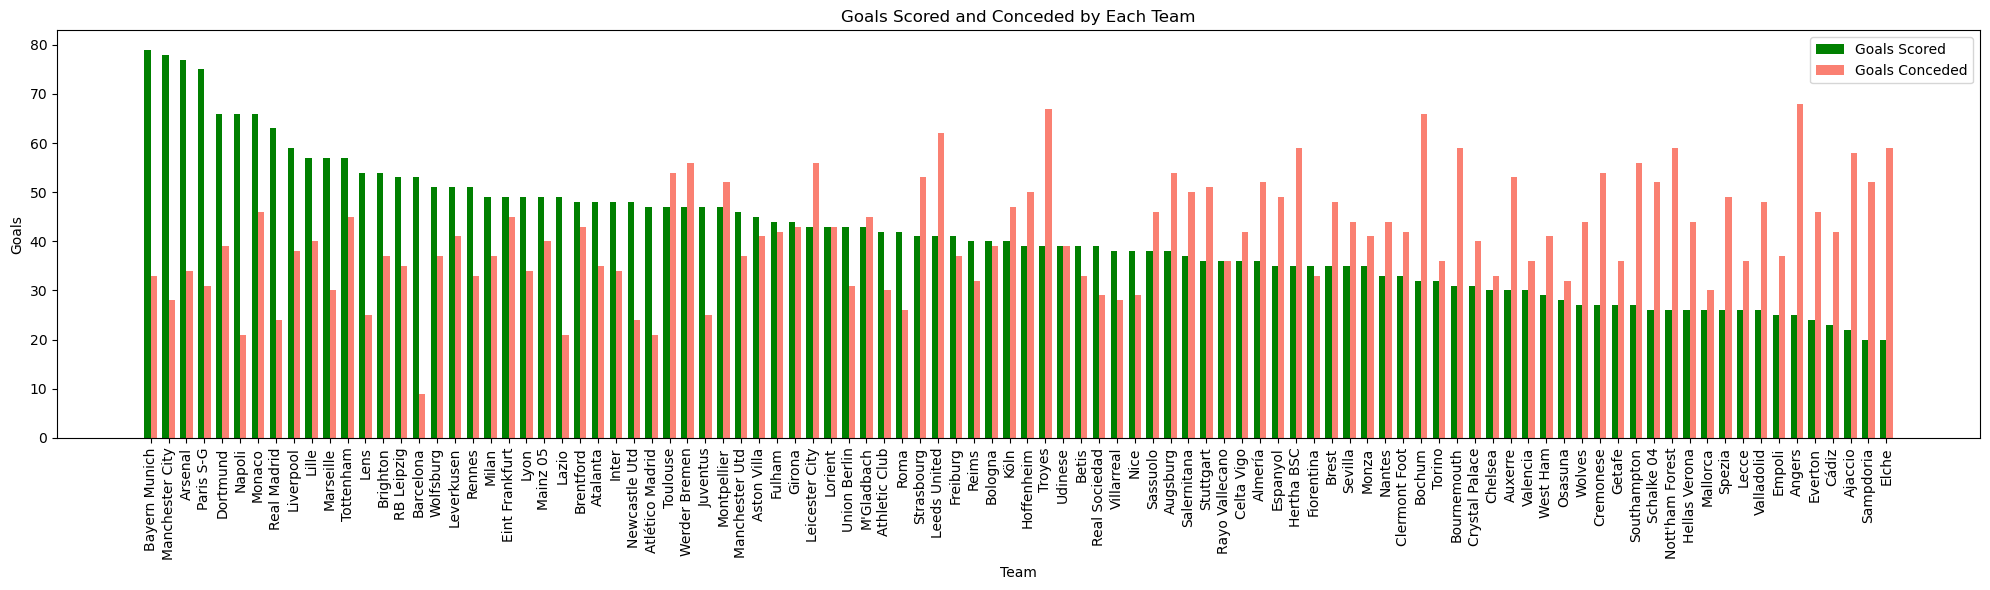

In [144]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

teamStatsDf_sorted = teamStatsDf.sort_values(by='GF', ascending=False).reset_index(drop=True)

fig, ax = plt.subplots(figsize=(20, 6))
index = np.arange(len(teamStatsDf_sorted['Squad'])) 
bar_width = 0.35

# Creating the bars for goals scored and conceded
ax.bar(index, teamStatsDf_sorted['GF'], bar_width, label='Goals Scored', color='green')
ax.bar(index + bar_width, teamStatsDf_sorted['GA'], bar_width, label='Goals Conceded', color='salmon')

ax.set_xlabel('Team')
ax.set_ylabel('Goals')
ax.set_title('Goals Scored and Conceded by Each Team')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(teamStatsDf_sorted['Squad'], rotation=90) 
ax.legend()

plt.tight_layout()
plt.show()


#  2.2: what are the countries that have the most fans ? 

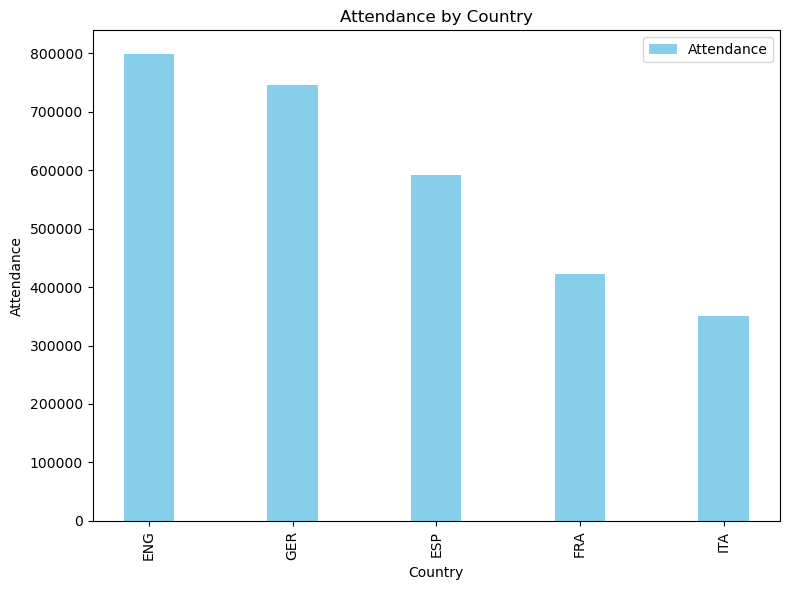

In [145]:
teamStatsDf_grouped = teamStatsDf.groupby('Country').sum().reset_index()
teamStatsDf_grouped_sorted = teamStatsDf_grouped.sort_values(by='Attendance', ascending=False).reset_index(drop=True)


fig, ax = plt.subplots(figsize=(8, 6))
index = np.arange(len(teamStatsDf_grouped_sorted['Country']))


ax.bar(index, teamStatsDf_grouped_sorted['Attendance'], bar_width, label='Attendance', color='skyblue')

ax.set_xlabel('Country')
ax.set_ylabel('Attendance')
ax.set_title('Attendance by Country')
ax.set_xticks(index)

ax.set_xticklabels(teamStatsDf_grouped_sorted['Country'], rotation=90)
ax.legend()


plt.tight_layout()
plt.show()


# 2.3 : what are the best teams in terms of league points ? 

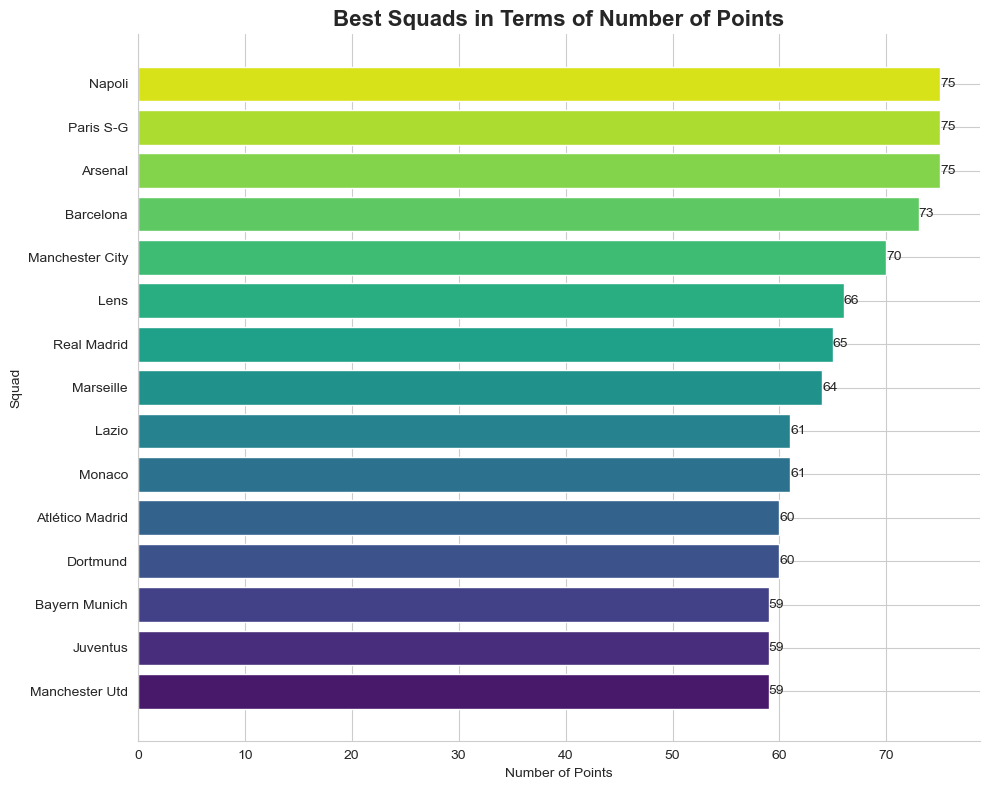

In [154]:
sns.set_style("whitegrid")

teamStatsDf_sorted = teamStatsDf.sort_values(by="Pts", ascending=True)

teamStatsDf_sorted= teamStatsDf_sorted.tail(15)

# Creating the horizontal bar plot
plt.figure(figsize=(10, 8))
bars = plt.barh(teamStatsDf_sorted['Squad'], teamStatsDf_sorted['Pts'], color=sns.color_palette("viridis", 15))

# Adding the data labels
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2,
             f'{bar.get_width()}',
             va='center', ha='left')

# Adding titles and labels
plt.xlabel('Number of Points')
plt.ylabel('Squad')
plt.title('Best Squads in Terms of Number of Points', fontsize=16, fontweight='bold')

sns.despine()

plt.tight_layout()
plt.show()


# 2.4: what are the best teams in term of attendance ? 

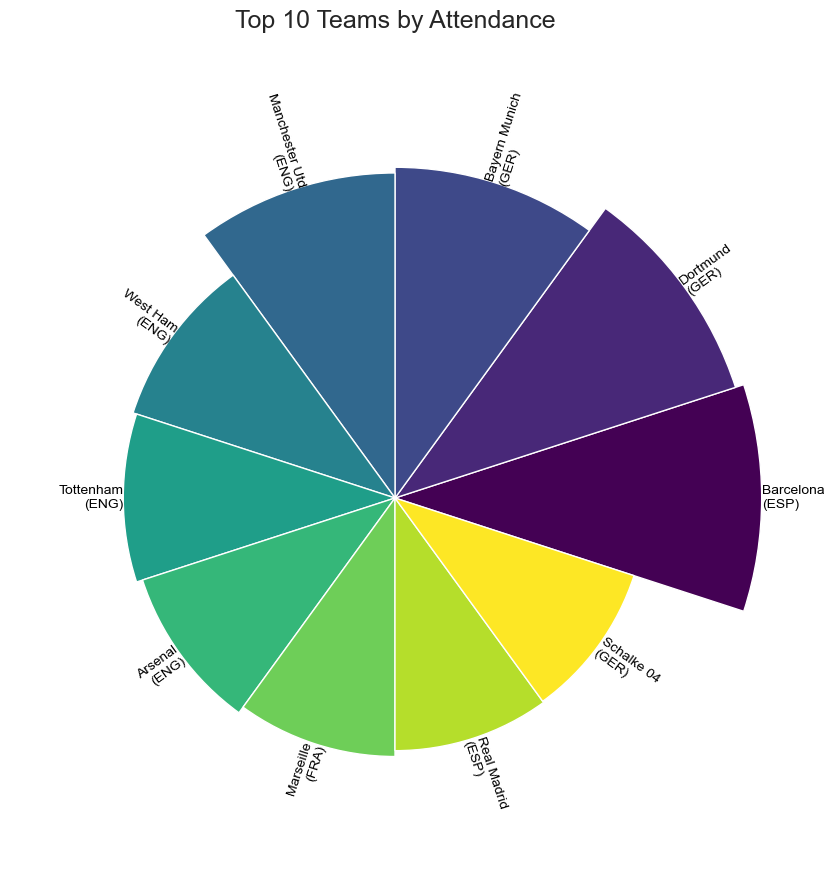

In [157]:
top_teams = teamStatsDf.nlargest(10, 'Attendance')

sns.set_style('whitegrid')

plt.figure(figsize=(10, 10))
ax = plt.subplot(111, polar=True)
ax.grid(False)
plt.axis("off")

fontlabels = {
    'family': 'Arial',
    'color': 'black',
    'size': '10',
}

heights = top_teams["Attendance"]
width = 2 * np.pi / len(top_teams)
angles = [element * width for element in range(len(top_teams))]
labels = [f'{row.Squad}\n({row.Country})' for index, row in top_teams.iterrows()]

colors = plt.cm.viridis(np.linspace(0, 1, len(top_teams)))

bars = ax.bar(x=angles, height=heights, width=width, linewidth=1, edgecolor='white', color=colors)

labelpadding = 20
for bar, angle, label in zip(bars, angles, labels):
    rotation = np.rad2deg(angle)
    alignment = "right" if (angle > np.pi / 2) and (angle < 3 * np.pi / 2) else "left"
    rotation += 180 if alignment == "right" else 0
    ax.text(x=angle, y=bar.get_height() + labelpadding, s=label,
            ha=alignment, va='center', rotation=rotation, rotation_mode='anchor',
            fontdict=fontlabels)

ax.set_title("Top 10 Teams by Attendance", fontdict={'fontsize': 18, 'fontfamily': 'Arial'}, loc='center', y=1.1)
plt.show()
